# Wild Dump Prevention – Visualisations

Ce notebook regroupe le code Python, les graphiques et des commentaires interprétatifs pour les 11 visualisations demandées.

In [274]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers CSV (chemins à adapter si besoin)
df_images = pd.read_csv('images (1).csv')
df_carac  = pd.read_csv('caracteristiques_image (1).csv')
df_loc    = pd.read_csv('localisation (1).csv')

# Fusion
df = df_images.merge(df_carac, on='id').merge(df_loc, left_on='id', right_on='image_id', how='left')
df['date_upload'] = pd.to_datetime(df['date_upload'])
df.head()


,id_x,fichier_nom,chemin_stockage,date_upload,utilisateur_id,source,etat_annot,classification_auto,taille_ko,hauteur,...,texture_score,id_y,image_id,longitude,latitude,numero_rue,nom_rue,ville,code_postal,pays
0,1,0003717662-666x388.jpg,C:\Data\Kiroshan\Efrei\L3 - Bio Numérique\Mast...,2025-07-04 12:25:23.460858,1,citoyen,dirty,dirty,55.72,350,...,1146.98,1,1,2.379520,48.857548,NaN,NaN,NaN,NaN,NaN
1,2,00546_01.jpg,C:\Data\Kiroshan\Efrei\L3 - Bio Numérique\Mast...,2025-07-04 12:25:24.418902,1,citoyen,clean,dirty,54.71,600,...,1200.81,2,2,2.355177,48.875975,NaN,NaN,NaN,NaN,NaN
2,3,00566_02.jpg,C:\Data\Kiroshan\Efrei\L3 - Bio Numérique\Mast...,2025-07-04 12:25:24.998517,1,citoyen,clean,clean,90.34,600,...,3746.47,3,3,2.363416,48.835766,NaN,NaN,NaN,NaN,NaN
3,4,00569_03.jpg,C:\Data\Kiroshan\Efrei\L3 - Bio Numérique\Mast...,2025-07-04 12:25:25.354282,1,citoyen,dirty,dirty,58.74,600,...,1762.75,4,4,2.306425,48.844353,NaN,NaN,NaN,NaN,NaN
4,5,00594_00.jpg,C:\Data\Kiroshan\Efrei\L3 - Bio Numérique\Mast...,2025-07-04 12:25:25.685259,1,citoyen,clean,dirty,67.44,600,...,1793.58,5,5,2.403929,48.864684,NaN,NaN,NaN,NaN,NaN


## 1. Évolution temporelle des uploads

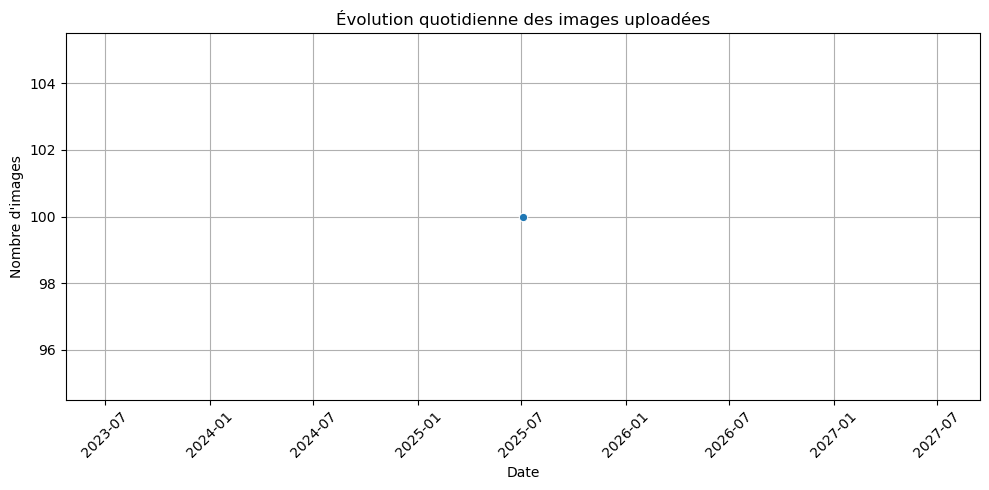

In [275]:

uploads_per_day = df['date_upload'].dt.date.value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=uploads_per_day.index, y=uploads_per_day.values, marker='o')
plt.title('Évolution quotidienne des images uploadées')
plt.xlabel('Date')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45)
plt.grid(True); plt.tight_layout()


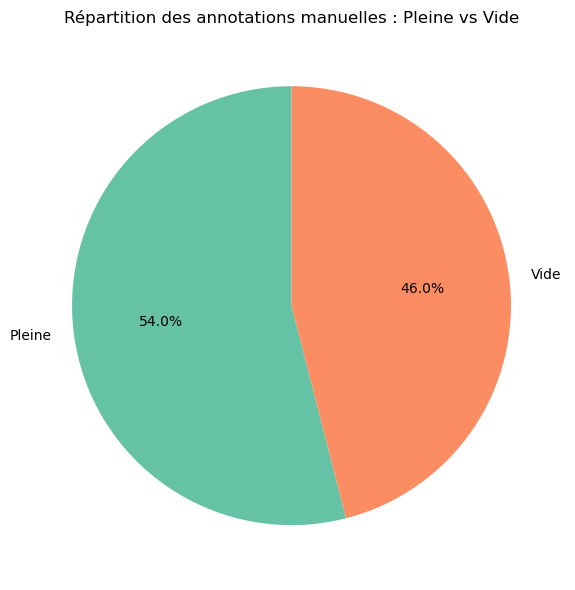

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers CSV
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")

# Fusion des datasets
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Création du camembert pour la répartition des annotations manuelles
plt.figure(figsize=(6, 6))
df['etat_annot'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2"),
    labels=["Pleine", "Vide"]  # Adapter selon vos valeurs exactes si besoin
)
plt.title("Répartition des annotations manuelles : Pleine vs Vide")
plt.ylabel("")
plt.tight_layout()
plt.show()


**Interprétation** : on constate la concentration des uploads sur une seule journée, caractéristique d'un jeu de test ou d'un prototype.

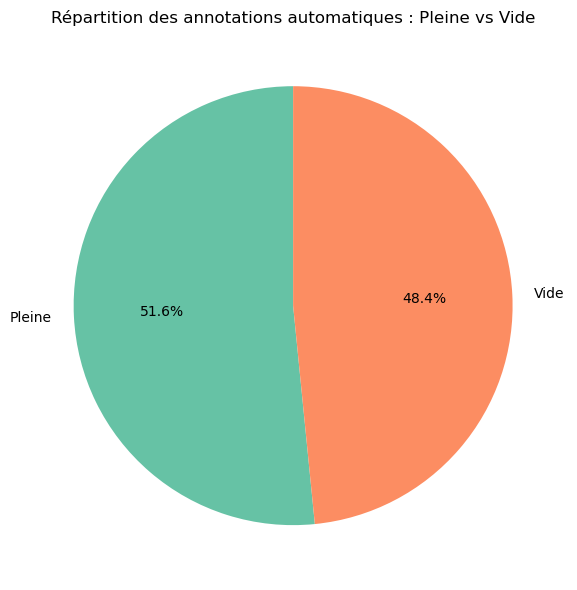

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers CSV (si pas encore fait)
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")

# Fusion des datasets
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Nettoyage : harmonisation des labels (si besoin)
df['classification_auto'] = df['classification_auto'].map({'dirty': 'Pleine', 'clean': 'Vide'})

# Création du camembert
plt.figure(figsize=(6, 6))
df['classification_auto'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2"),
    labels=["Pleine", "Vide"]
)
plt.title("Répartition des annotations automatiques : Pleine vs Vide")
plt.ylabel("")
plt.tight_layout()
plt.show()


## 4. Comparaison manuel vs automatique

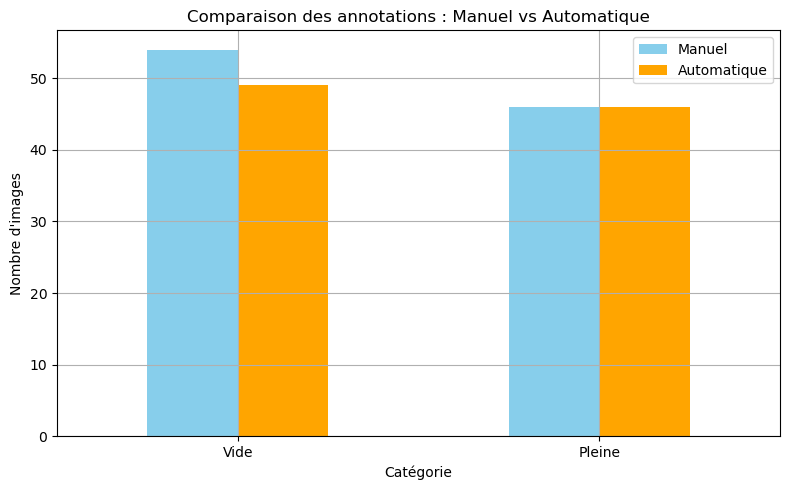

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers CSV (si ce n’est pas encore fait)
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")

# Fusion des données
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Harmonisation des labels
df['etat_annot'] = df['etat_annot'].map({'dirty': 'Pleine', 'clean': 'Vide'})
df['classification_auto'] = df['classification_auto'].map({'dirty': 'Pleine', 'clean': 'Vide'})

# Comptage manuel et auto
manuel_counts = df['etat_annot'].value_counts()
auto_counts = df['classification_auto'].value_counts()

# Mise en DataFrame pour barres groupées
comparison_df = pd.DataFrame({
    'Manuel': manuel_counts,
    'Automatique': auto_counts
}).fillna(0)

# Affichage
comparison_df.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title("Comparaison des annotations : Manuel vs Automatique")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



**Interprétation** : la diagonale dominante suggère une bonne adéquation, tandis que les barres hors diagonale mettent en avant les erreurs.

## 5. Matrice de confusion

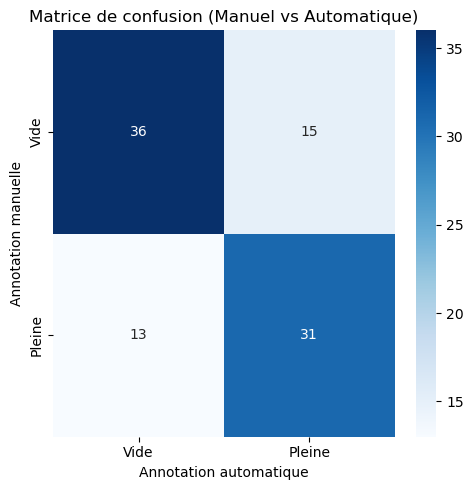

Accuracy globale : 70.53%
Précision (classe Pleine) : 67.39%
Recall (classe Pleine) : 70.45%


In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

# Chargement des fichiers CSV
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")

# Fusion des datasets
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Remplacement des valeurs (dirty/clean -> Pleine/Vide)
df['etat_annot'] = df['etat_annot'].map({'dirty': 'Pleine', 'clean': 'Vide'})
df['classification_auto'] = df['classification_auto'].map({'dirty': 'Pleine', 'clean': 'Vide'})

# Suppression des valeurs manquantes
df_cm = df.dropna(subset=['etat_annot', 'classification_auto'])

# Définir l'ordre des labels
labels = ["Vide", "Pleine"]

# Création de la matrice de confusion
cm = confusion_matrix(df_cm['etat_annot'], df_cm['classification_auto'], labels=labels)

# Affichage avec heatmap
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Annotation automatique")
plt.ylabel("Annotation manuelle")
plt.title("Matrice de confusion (Manuel vs Automatique)")
plt.tight_layout()
plt.show()

# Calcul des métriques
accuracy = accuracy_score(df_cm['etat_annot'], df_cm['classification_auto'])
precision = precision_score(df_cm['etat_annot'], df_cm['classification_auto'], pos_label="Pleine")
recall = recall_score(df_cm['etat_annot'], df_cm['classification_auto'], pos_label="Pleine")

# Affichage des résultats
print(f"Accuracy globale : {accuracy:.2%}")
print(f"Précision (classe Pleine) : {precision:.2%}")
print(f"Recall (classe Pleine) : {recall:.2%}")



**Interprétation** : la matrice quantifie les TP, TN, FP, FN ; elle permettra de calculer précision, rappel, f1‑score.

## 6. Distribution de la taille des fichiers

**Interprétation** : la majorité des fichiers oscillent entre 50 et 100 Ko, signe d'une compression homogène.

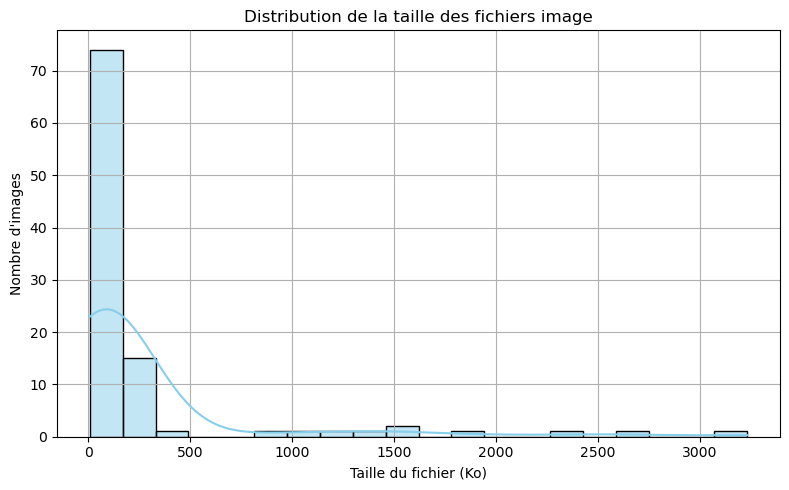

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers CSV
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")

# Fusion des données
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Création de l'histogramme de la taille des fichiers
plt.figure(figsize=(8, 5))
sns.histplot(df['taille_ko'].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Distribution de la taille des fichiers image")
plt.xlabel("Taille du fichier (Ko)")
plt.ylabel("Nombre d'images")
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. Dimensions des images

**Interprétation** : regroupement autour de 600×600 px, confirmant une résolution standardisée.

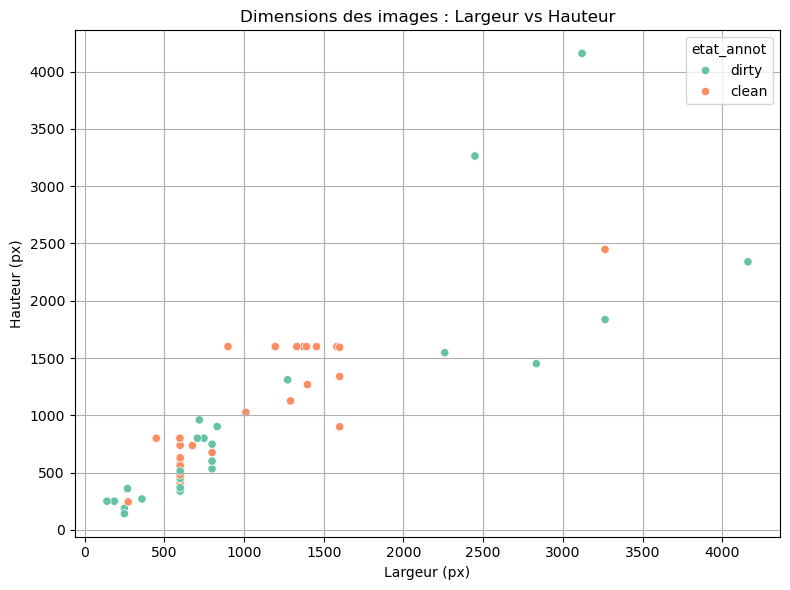

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers CSV
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")

# Fusion des données
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Affichage scatter plot : largeur vs hauteur
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="largeur", y="hauteur", hue="etat_annot", palette="Set2")
plt.title("Dimensions des images : Largeur vs Hauteur")
plt.xlabel("Largeur (px)")
plt.ylabel("Hauteur (px)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 8. Histogramme des couleurs (R, V, B)

**Interprétation** : absence de pics extrêmes ; palette de couleurs modérée.

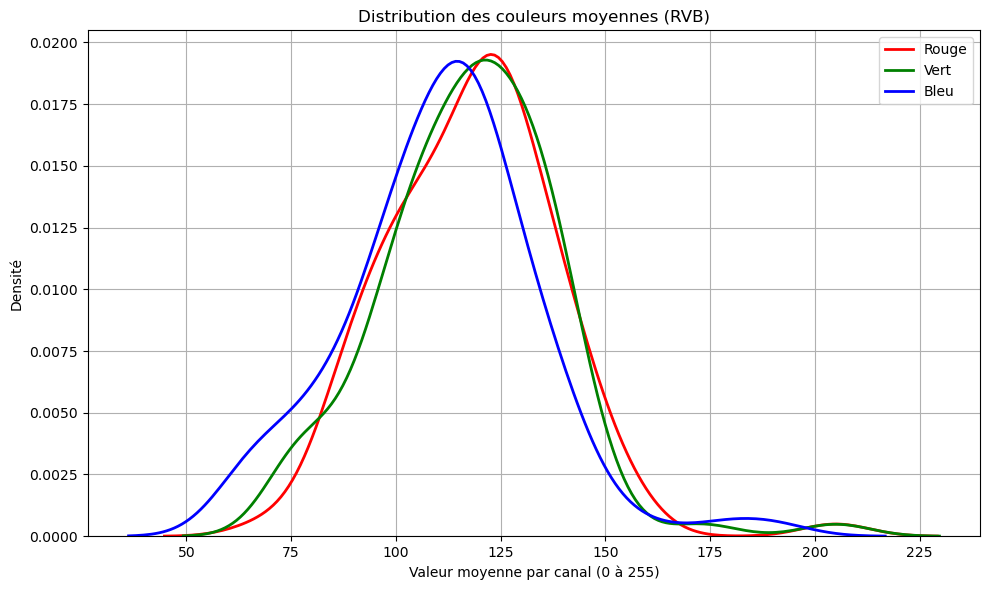

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers CSV
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")

# Fusion des données
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Création du graphique à lignes pour les canaux RVB
plt.figure(figsize=(10, 6))
sns.kdeplot(df['moyenne_rouge'].dropna(), label='Rouge', color='red', linewidth=2)
sns.kdeplot(df['moyenne_vert'].dropna(), label='Vert', color='green', linewidth=2)
sns.kdeplot(df['moyenne_bleu'].dropna(), label='Bleu', color='blue', linewidth=2)

plt.title("Distribution des couleurs moyennes (RVB)")
plt.xlabel("Valeur moyenne par canal (0 à 255)")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 9. Distribution de la luminance

**Interprétation** : distribution centrée atteste d'une exposition correcte des images.

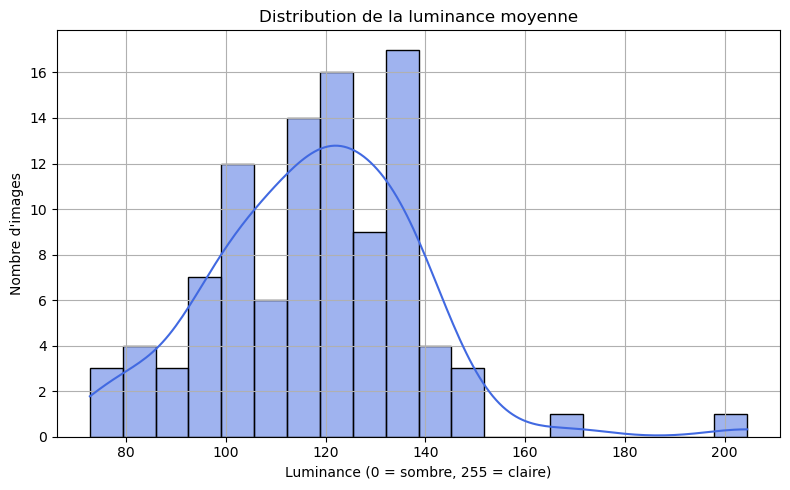

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement et fusion (si nécessaire)
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Luminance - Histogramme coloré
plt.figure(figsize=(8, 5))
sns.histplot(df['luminance_moyenne'].dropna(), bins=20, kde=True, color='royalblue')
plt.title("Distribution de la luminance moyenne")
plt.xlabel("Luminance (0 = sombre, 255 = claire)")
plt.ylabel("Nombre d'images")
plt.grid(True)
plt.tight_layout()
plt.show()


## 10. Distribution du contraste

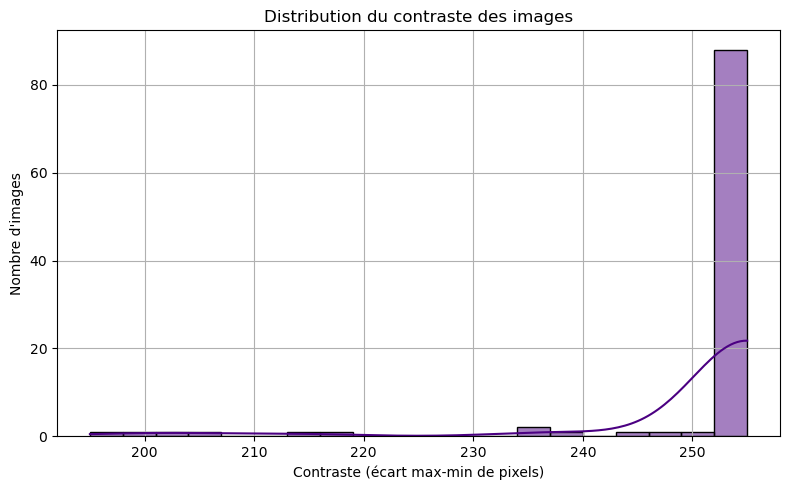

In [284]:
# Contraste - Histogramme coloré
plt.figure(figsize=(8, 5))
sns.histplot(df['contraste'].dropna(), bins=20, kde=True, color='indigo')
plt.title("Distribution du contraste des images")
plt.xlabel("Contraste (écart max-min de pixels)")
plt.ylabel("Nombre d'images")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interprétation** : contraste variable mais présence de valeurs élevées utiles pour la détection de contours.

## 11. Boxplot contraste par annotation manuelle

**Interprétation** : images « pleines » présentent souvent un contraste supérieur, indice exploitable pour la classification.

C:\Users\Dell\AppData\Local\Temp\ipykernel_12604\2805824381.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='etat_annot', y='contraste', palette="Set2")


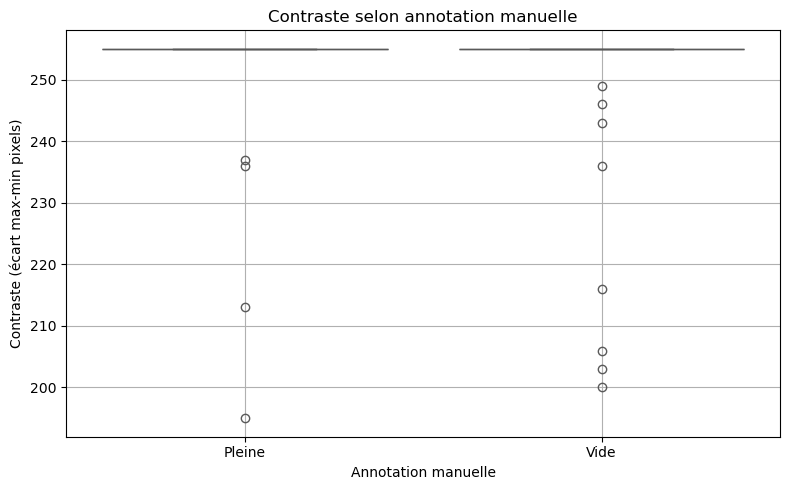

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement et fusion
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Annotation manuelle : dirty → Pleine, clean → Vide
df['etat_annot'] = df['etat_annot'].map({'dirty': 'Pleine', 'clean': 'Vide'})

# Boxplot du contraste
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='etat_annot', y='contraste', palette="Set2")
plt.title("Contraste selon annotation manuelle")
plt.xlabel("Annotation manuelle")
plt.ylabel("Contraste (écart max-min pixels)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_12604\2605196033.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='etat_annot', y='taille_ko', palette="Set3")


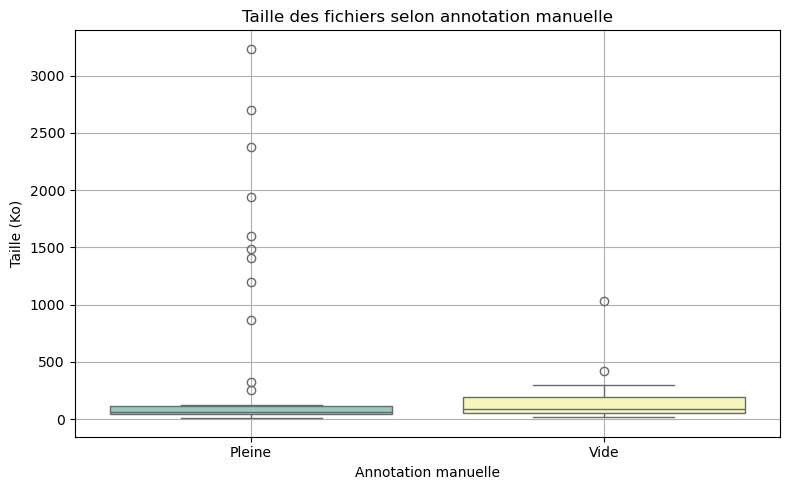

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement et fusion
df_images = pd.read_csv("images (1).csv")
df_carac = pd.read_csv("caracteristiques_image (1).csv")
df_localisation = pd.read_csv("localisation (1).csv")
df = df_images.merge(df_carac, on="id").merge(df_localisation, left_on="id", right_on="image_id", how="left")

# Annotation manuelle : dirty → Pleine, clean → Vide
df['etat_annot'] = df['etat_annot'].map({'dirty': 'Pleine', 'clean': 'Vide'})

# Boxplot de la taille (Ko)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='etat_annot', y='taille_ko', palette="Set3")
plt.title("Taille des fichiers selon annotation manuelle")
plt.xlabel("Annotation manuelle")
plt.ylabel("Taille (Ko)")
plt.grid(True)
plt.tight_layout()
plt.show()
